<a href="https://colab.research.google.com/github/yebiny/SkillTreePython-DataAnalysis/blob/main/05.%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%EA%B8%B0%EB%B0%98%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D/%ED%95%B4%EC%84%A4/ch05_03_%EA%B8%B0%EC%B4%88%EB%AA%A8%EB%8D%B8%EA%B5%AC%ED%98%84_%ED%9A%8C%EA%B7%80%EB%AA%A8%EB%8D%B8%EB%A7%9B%EB%B3%B4%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ch05.03. 기초모델 구현 - 회귀모델 맛보기
---
* 날짜:
* 이름:

## 학습내용
    - 회귀 분석의 개념에 대해 이해한다
    - 단순 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 다중 회귀 문제일 때의 프로세스에 대해 이해한다.
    - 모델링에 대한 전체적인 프로세스 과정을 이해한다. 

```
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")
```

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("ggplot")

## 단순 회귀 문제
---




|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 데이터 정의

In [ ]:
xs = np.array([3,5,5,7,8])
ys = np.array([20,50,60,90,100])

* 데이터 시각화

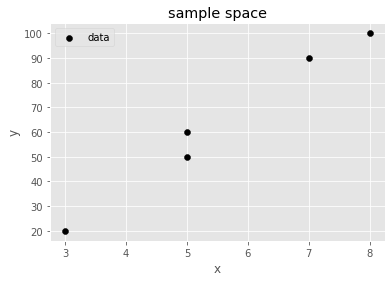

In [ ]:
plt.scatter(xs, ys, c='k', label='data')
plt.title('sample space')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(x;w) = wx$

* 모델 정의

In [ ]:
def model_simple(x, w=1):
  return w*x

* 초기 모델 사용


|공부시간(x)|종합점수(y)| 예측값 ($\hat{y})$|
|------|---|--|
|3|20||
|5|50||
|5|60||
|7|90||
|8|100||

In [ ]:
model_simple(xs)

array([3, 5, 5, 7, 8])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [ ]:
def propagation(xs, ys, w):
  total_loss = 0
  for x, y in zip(xs, ys):
    y_hat = model_simple(x, w)
    loss = np.abs(y_hat-y)
    total_loss+=loss
  return total_loss

w = 1
total_loss = propagation(xs, ys, w=w)
print(total_loss)

292


### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w$를 5부터 20까지 바꿔가며 손실 계산하기


[180 152 126 104  82  60  48  36  44  72 100 128 156 184 212]


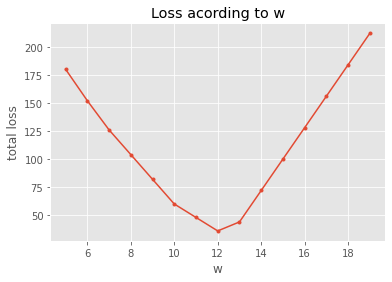

In [ ]:
ws = np.arange(5,20)
total_loss = propagation(xs, ys, w=ws)
print(total_loss)

plt.plot(ws, total_loss, marker='.')
plt.title('Loss acording to w')
plt.xlabel('w')
plt.ylabel('total loss')
plt.show()

### **| step 4. 예측 (Prediction)**

* 학습 완료된 모델의 최종 손실 계산

In [ ]:
w_ = 12
propagation(xs, ys, w_) #학습이 끝나면 학습파라미터 고정

36

* 학습 완료된 모델에 대한 예측 시각화

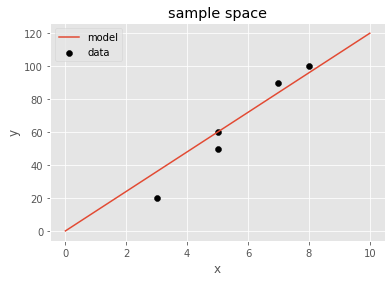

In [ ]:
x_every = np.arange(11)
y_preds = model_simple(x_every, w=w_)

# 실제 데이터 플롯
plt.scatter(xs, ys, c='k', label='data')
# 모델 예측 플롯
plt.plot(x_every, y_preds, label='model')

plt.title('sample space')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

* 공부시간이 6시간일 때 예상 점수는?


In [ ]:
model_simple(6, w=w_)

72

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|3|20|
|5|50|
|5|60|
|7|90|
|8|100|

* 테스트 데이터셋

|공부시간(x)|종합점수(y)|
|------|---|
|1|5|
|2|15|
|5|55|
|6|80|
|7|85|

* 테스트 데이터셋 정의

In [ ]:
x_tests = np.array([1,2,5,6,7])
y_tests = np.array([5,15,55,80,85])

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산 (평가)

In [ ]:
propagation(x_tests, y_tests, w=w_)

30

* 학습 완료된 모델에 테스트 데이터 예측 시각화

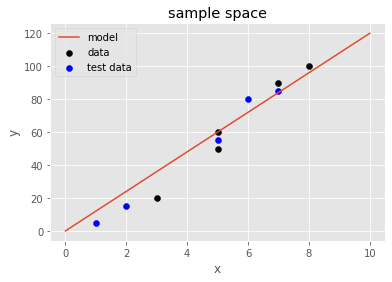

In [ ]:
# 실제 데이터 플롯
plt.scatter(xs, ys, c='k', label='data')
# 모델 예측 플롯
plt.plot(x_every, y_preds, label='model')
# 테스트 데이터 플롯
plt.scatter(x_tests, y_tests, c='b', label='test data')

plt.title('sample space')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

## 다중 회귀 문제
---



|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|


* 데이터 정의

In [ ]:
X = np.array([2,9,6,8,4,7,7,6,8,6]).reshape(5,2)
ys = np.array([20,50,60,90,100])
X, ys, X.shape, ys.shape

(array([[2, 9],
        [6, 8],
        [4, 7],
        [7, 6],
        [8, 6]]), array([ 20,  50,  60,  90, 100]), (5, 2), (5,))

* 데이터 시각화

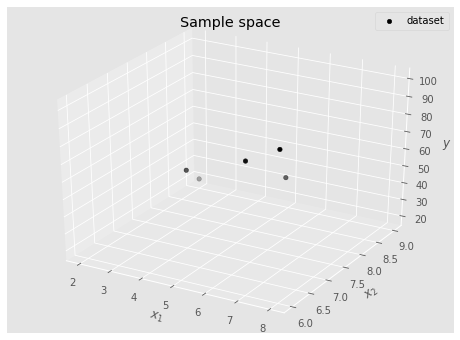

In [ ]:
fig = plt.figure(figsize=(8,6))
ax = plt.axes(projection='3d')
ax.scatter3D(X[:,0], X[:,1], ys, c='k', marker='o', label='dataset')

ax.set_title('Sample space')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
plt.legend()
plt.show()

### **| step 1. 모델 구현**

$model(\vec{x};\vec{w}) = w_1x_1+w_2x_2$

* 모델 정의

In [ ]:
def model_multi(x1, x2, w1=1, w2=1):
  return (x1*w1)+(x2*w2)

* 초기 모델 사용


|공부시간|수면시간|종합점수|예측값 ($\hat{y}$)|
|------|---|--|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

In [ ]:
x1s = X[:,0]
x2s = X[:,1]
model_multi(x1s, x2s)

array([11, 14, 11, 13, 14])

### **| step 2. 손실 (loss) 계산**

$loss = |(\hat{y}-y)|$

* 손실 계산 과정 정의

In [ ]:
def propagation(X, ys, w1, w2):
  total_loss = 0
  for x, y in zip(X, ys):
    y_hat = model_multi(x[0], x[1], w1, w2)
    loss = np.abs(y_hat-y)
    total_loss+=loss
  return total_loss

w1, w2 = 1, 1
total_loss = propagation(X, ys, w1, w2)
total_loss

257

### **| step 3. 최적화 (Optimizer)**


*  학습 파라미터 $w_1$를 0부터 30, $w_2$를 -10부터 10까지 바꿔가며 손실 계산하기


In [ ]:
w1s = np.arange(30)
w2s = np.arange(-10,10)
W1, W2 = np.meshgrid(w1s,w2s)
L = propagation(X, ys, W1, W2)
L.shape

(20, 30)

* 3d플롯으로 시각화

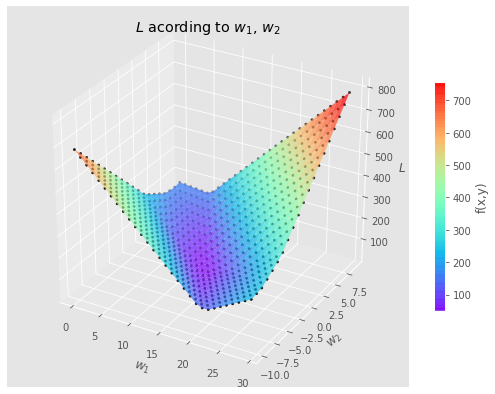

In [ ]:
fig = plt.figure(figsize=(9,7))
ax = plt.axes(projection='3d')
ax.scatter3D(W1, W2, L, c='k', marker='.')
surf = ax.plot_surface(W1, W2, L, cmap='rainbow', alpha=.7)

ax.set_title('$L$ acording to $w_1$, $w_2$')
ax.set_xlabel('$w_1$')
ax.set_ylabel('$w_2$')
ax.set_zlabel('$L$')
fig.colorbar(surf, shrink=.6, label='f(x,y)')
plt.show()

### **| step 4. 예측 (Prediction)**

* 최적화된 파라미터 정의

In [ ]:
idx = np.unravel_index(np.argmin(L, axis=None), L.shape)
print(np.min(L), idx)
print(W1[idx], W2[idx])
w1_ , w2_ = W1[idx], W2[idx]

45 (9, 13)
13 -1


* 학습 완료된 모델의 최종 손실 계산

In [ ]:
propagation(X, ys, w1=w1_, w2=w2_)

45

* 학습 완료된 모델에 대한 예측 시각화

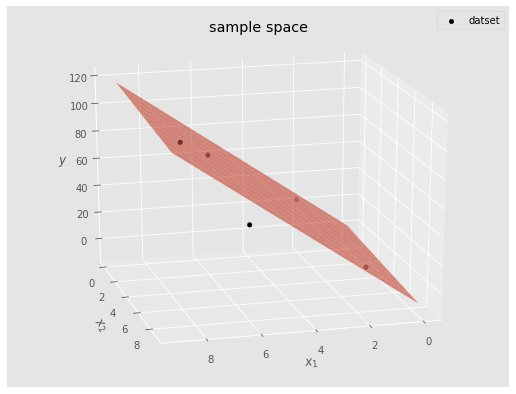

In [ ]:
x_rvs1 = np.arange(0, 10)
x_rvs2 = np.arange(0, 10)
X_rvs1, X_rvs2 = np.meshgrid(x_rvs1, x_rvs2)
X_rvs1.shape, X_rvs2.shape
Y_pred = model_multi(X_rvs1, X_rvs2, w1=w1_, w2=w2_)

fig = plt.figure(figsize=(9,7))
ax = plt.axes(projection='3d')
# 데이터셋
ax.scatter3D(X[:,0], X[:,1], ys, c='k', marker='o', label='datset')
# 예측
ax.plot_surface(X_rvs1, X_rvs2, Y_pred, alpha=.6)

ax.set_title('sample space')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.view_init(20, 75)
ax.legend() 
plt.show()

* 공부시간이 6시간이고 수면시간 5시간 일 때 예상 점수는?


In [ ]:
model_multi(6, 5, w1_, w2_)

73

### **| step 5. 평가 (Evaluation)**

* 훈련 데이터셋


|공부시간|수면시간|종합점수|
|------|---|--|
|2|9|20|
|6|8|50|
|4|7|60|
|7|6|90|
|8|6|100|

* 테스트 데이터셋

|공부시간|수면시간|종합점수|
|------|---|--|
|1|7|15|
|3|8|25|
|5|7|60|
|5|6|90|
|10|7|95|

* 테스트 데이터셋 정의

In [ ]:
X_test = np.array([1,7,3,8,5,7,5,6,10,7]).reshape(5,2)
ys_test = np.array([15,25,60,90,95])
X, ys_test, X.shape, ys_test.shape

(array([[2, 9],
        [6, 8],
        [4, 7],
        [7, 6],
        [8, 6]]), array([15, 25, 60, 90, 95]), (5, 2), (5,))

* 학습 완료된 모델에 테스트 데이터로 최종 손실 계산

In [ ]:
propagation(X_test, ys_test, w1_, w2_)

76

* 학습 완료된 모델에 테스트 데이터 예측 시각화

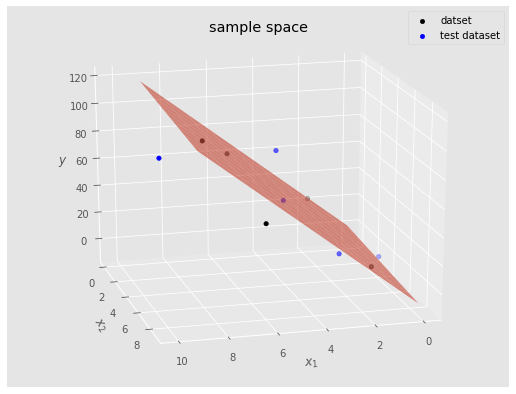

In [ ]:
x_rvs1 = np.arange(0, 10)
x_rvs2 = np.arange(0, 10)
X_rvs1, X_rvs2 = np.meshgrid(x_rvs1, x_rvs2)
X_rvs1.shape, X_rvs2.shape
Y_pred = model_multi(X_rvs1, X_rvs2, w1=w1_, w2=w2_)

fig = plt.figure(figsize=(9,7))
ax = plt.axes(projection='3d')
# 데이터셋
ax.scatter3D(X[:,0], X[:,1], ys, c='k', marker='o', label='datset')
# 예측
ax.plot_surface(X_rvs1, X_rvs2, Y_pred, alpha=.6)
# 테스트 데이터셋
ax.scatter3D(X_test[:,0], X_test[:,1], ys_test, c='b', marker='o', label='test dataset')

ax.set_title('sample space')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$y$')
ax.view_init(20, 75)
ax.legend() 
plt.show()

## 클래스 작성하기
---

```
단순 회귀 문제 모델을 클래스로 작성합니다.

model = SimpleModel() # 모델 클래스가 생성됩니다.
model.fit(xs, ys) # 최적화가 진행됩니다.
model.predict(xs) # 예측을 진행합니다.
model.validation(xs, ys) # 평가를 진행합니다.
```

In [ ]:
class SimpleModel():
  def __init__(self, random_state=1):
    self.w = 1
    self.loss = 10000

  def model(self, x, w):
    return w*x

  def propagation(self, xs, ys, w):
    total_loss = 0
    for x, y in zip(xs, ys):
      y_pred = self.model(x, w=w) 
      loss = np.abs(y_pred-y) 
      total_loss += loss 
    return total_loss/len(xs)
  
  def validation(self, x, y):
    loss = self.propagation(x, y, self.w)
    return loss

  def fit(self, x, y, grid=[-10,10]):
    for w in range(grid[0], grid[1]):
      loss_tmp = self.propagation(x, y, w)
      if self.loss > loss_tmp:
        self.loss = loss_tmp
        self.w = w
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}')
      else:
        print(f'w: {w}  loss:{np.round(loss_tmp,2)}, stop learning')
        break
 
  def predict(self, x):
    pred = self.model(x, w=self.w)
    return pred

  def plot_xy(self, x, y):
    plt.scatter(x, y, c='k', label='data')
    plt.plot(x, self.model(x, self.w), c='r', label='model')
    plt.legend()
    plt.show()
  

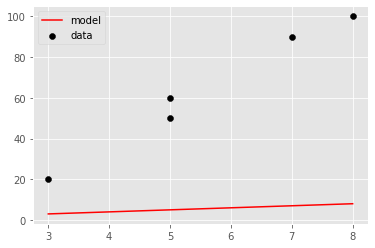

* 초기 예측값: [3 5 5 7 8]
* 초기 평가: 58.4
w: 0  loss:64.0
w: 1  loss:58.4
w: 2  loss:52.8
w: 3  loss:47.2
w: 4  loss:41.6
w: 5  loss:36.0
w: 6  loss:30.4
w: 7  loss:25.2
w: 8  loss:20.8
w: 9  loss:16.4
w: 10  loss:12.0
w: 11  loss:9.6
w: 12  loss:7.2
w: 13  loss:8.8, stop learning


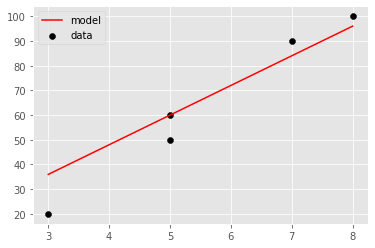

* 학습 후 예측값: [36 60 60 84 96]
* 학습 후 평가: 7.2


In [ ]:

xs = np.array([3,5,5,7,8])
ys = np.array([20, 50, 60, 90, 100])

model = SimpleModel()
model.plot_xy(xs, ys)
print('* 초기 예측값:' , model.predict(xs))
print('* 초기 평가:', model.validation(xs, ys))

model.fit(xs, ys, [0, 15])
model.plot_xy(xs, ys)
print('* 학습 후 예측값:' , model.predict(xs))
print('* 학습 후 평가:', model.validation(xs, ys))